# Project Business Statistics: E-news Express

**Marks: 60**

## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

   1. Do the users spend more time on the new landing page than on the existing landing page?
   2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
   3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
   4. Is the time spent on the new page the same for the different language users?

## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

   1. user_id - Unique user ID of the person visiting the website
   2. group - Whether the user belongs to the first group (control) or the second group (treatment)
   3. landing_page - Whether the landing page is new or old
   4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
   5. converted - Whether the user gets converted to a subscriber of the news portal or not
   6. language_preferred - Language chosen by the user to view the landing page


## Define Problem Statement and Objectives

The goal of the test is not to see how well liked the is landing page is liked by the users.  The goal is to determine if the new landing page leads to more conversions of general users into subscribed users.  Like any good retail web site, the goal is to make a sale to a user and keep them coming back.  In this case, the sale is a subscription to the site and therefore a repeat customer.  Some of the ways this happens is: (from https://www.searchenginejournal.com/convert-website-visitors/202576/#close) 
1. Create Quality Content to Match Search Intent
2. Use the Right Call To Action 
3. Focus on Design for Subscriptions
4. Use Different Types of Content
5. Use Lightboxes 
6. Advertise Your Subscription: Solve Problems
7. Analyze Your Content

It is important to note that the conversion rate for e-commerce sites is very low.  The following information covers 2020: 
<br>
_The latest survey and studies in 2020 show that the average conversion rate of e-commerce websites is 2.86%. The average eCommerce website conversion rate in the US stands at 2.63% as compared to the global website conversion rate of 4.31%.
<br>
Source: https://www.invespcro.com/blog/the-average-website-conversion-rate-by-industry/#:~:text=The%20latest%20survey%20and%20studies,protected%20data%20on%20the%20web_

Given this at the beginning of the project, I would set expectations that the conversion rate will be low and to not expect a 90% or better conversion rate.  A 5% conversion rate would be a great success.  

Note: not mentioned here, but it would be interesting to know what the company's current conversion rate is.  

## Import all the necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

import scipy.stats as stats  
# this library contains a large number of probability distributions as well as a growing library of statistical functions

from scipy.stats import binom
from scipy.stats import uniform
from scipy.stats import norm

# disable warnings 
import warnings
warnings.filterwarnings("ignore")

## Reading the Data into a DataFrame

In [2]:
# read the data
df = pd.read_csv('TestData_Files/abtest.csv')
#Ran code on local machine using Anaconda


## Check of Data Quality and Characteristics

The follow section looks at the collected data for its quality and characteristics.  The tests will determine: 
* Use head() and tail() to get a general look at the data 
* Check its shape 
* Determine if there are any non-null values and duplicates 
* Obtain value count for group and landing page 
    * Make sure there are 50 of each 
* Ensure 100 unique users 

Following a best practice recommendation, the data type for group, language_preferred, and converted are changed into category. 

In [3]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [5]:
#Changing the columns 'group' and 'language_perferred' into the category data type because that is what they are
#Suggestion from Tasleem

df['group'] = df.group.astype('category')
df['language_preferred'] = df.language_preferred.astype('category')
df['converted'] = df.converted.astype('category')

In [6]:
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 100 rows and 6 columns.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    object  
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(3), float64(1), int64(1), object(1)
memory usage: 3.1+ KB


In [6]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [7]:
dups = df[df.duplicated()]
dups

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred


In [12]:
print(df['group'].value_counts())
print('\n')
df['group'].value_counts(normalize=True)

control      50
treatment    50
Name: group, dtype: int64




control      0.5
treatment    0.5
Name: group, dtype: float64

In [5]:
print(df['landing_page'].value_counts())
print('\n')
df['landing_page'].value_counts(normalize=True)

old    50
new    50
Name: landing_page, dtype: int64




old    0.5
new    0.5
Name: landing_page, dtype: float64

In [20]:
df['user_id'].nunique()

# This is to get the number of individual customers 

100

The following can be determined from the quality and characteristics check: 
* Shape is 100 rows and 6 columns  
* No non-null values 
* No duplicates 
* 50 users in control group and 50 in treatment group 
* 50 users use the old landing page and 50 use the new landing page 
* 100 unique users 

In summary, the data is fully populated and is clean.  It can be used for the test. 

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

The requested information was handled in the last section.  
<br> 
This section will concentrate on the numeric data in the data set.  

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


For time spent on Landing Page: 
* mean = 5.778
* standard deviation = 2.378166
* min = 0.19 
* max = 10.71
* 25% = 3.88 
* 50% (median) = 5.415 
* 75% = 7.0225 

In [15]:
print('The number of users who converted to a subscription is:')
print(df['converted'].value_counts())
print('\nThe conversion percentage is:')
df['converted'].value_counts(normalize=True)

The number of users who converted to a subscription is:
yes    54
no     46
Name: converted, dtype: int64

The conversion percentage is:


yes    0.54
no     0.46
Name: converted, dtype: float64

More users converted to subscriptions than not.  How the new landing page influenced this choice needs to be determined.  

In [16]:
print('The distribution of languages is: ')
print(df['language_preferred'].value_counts())
print('\nThe language preference percentage is:')
df['language_preferred'].value_counts(normalize=True)

The distribution of languages is: 
French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

The language preference percentage is:


French     0.34
Spanish    0.34
English    0.32
Name: language_preferred, dtype: float64

The langauge preference between English, French, and Spanish is just about the same.  It is roughly a third each.  There is no clear dominate language.  In other words, it is highly unlikely that presenting web content in one language or another will have a great affect on the conversion rate.  

### Univariate Analysis

Graphs are very helpful, but I like looking at the raw numbers.  
<br>
I have also found it helpful when presenting to a C-Suite executives to present graphs and to also have the numbers available in case they want to see them.  

In [9]:
print('Mean time spent on new and old landing page for all users')
print(df.groupby(['landing_page'])['time_spent_on_the_page'].mean()) 
print('\nMedian time spent on new and old landing page for all users')
print(df.groupby(['landing_page'])['time_spent_on_the_page'].median()) 
print('\n Mean time spent on new and old landing page for all users by language preference')
print(df.groupby(['language_preferred'])['time_spent_on_the_page'].mean()) 
print('\n Median time spent on new and old landing page for all users by language preference')
print(df.groupby(['language_preferred'])['time_spent_on_the_page'].median()) 
print('\n Mean time spent on new and old landing page for all users by choice to convert')
print(df.groupby(['converted'])['time_spent_on_the_page'].mean()) 
print('\n Median time spent on new and old landing page for all users by choice to convert')
print(df.groupby(['converted'])['time_spent_on_the_page'].median()) 
print('\n')

Mean time spent on new and old landing page for all users
landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

Median time spent on new and old landing page for all users
landing_page
new    6.105
old    4.380
Name: time_spent_on_the_page, dtype: float64

 Mean time spent on new and old landing page for all users by language preference
language_preferred
English    5.559062
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64

 Median time spent on new and old landing page for all users by language preference
language_preferred
English    5.755
French     5.315
Spanish    5.605
Name: time_spent_on_the_page, dtype: float64

 Mean time spent on new and old landing page for all users by choice to convert
converted
no     3.915870
yes    6.623148
Name: time_spent_on_the_page, dtype: float64

 Median time spent on new and old landing page for all users by choice to convert
converted
no     3.980
yes    6.495
Name: time_spent_

Users are spending more time on the new page and if they convert, spend roughly double the amount of time on the new page.  This shows the popularity of the new page, but this test is to determine if there is an increase in conversion rates.  Time spent on the new landing page is just "icing on the cake". 

In [12]:
langdf = df[df['language_preferred'] == 'English']
engconv = langdf['converted'].value_counts()
langdf = df[df['language_preferred'] == 'French']
freconv = langdf['converted'].value_counts()
langdf = df[df['language_preferred'] == 'Spanish']
spaconv = langdf['converted'].value_counts()
print('Of English users,', engconv[0], 'converted to the new page and', engconv[1], 'did not')
print('Of French users,', freconv[0], 'converted to the new page and', freconv[1], 'did not')
print('Of Spanish users,', spaconv[0], 'converted to the new page and', spaconv[1], 'did not')

Of English users, 21 converted to the new page and 11 did not
Of French users, 19 converted to the new page and 15 did not
Of Spanish users, 18 converted to the new page and 16 did not


From the raw numbers, it appears the conversion rate for each language is roughly the same and is causing users to convert.  However, the statistical tests need to be run to determine if this is actually the case.  

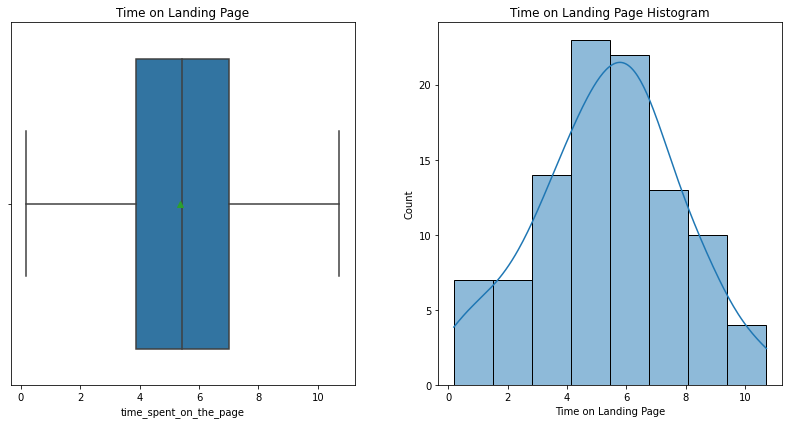

In [17]:
plt.figure(figsize=(17, 6))

plt.subplot(131)
plt.title('Time on Landing Page')
plt.xlabel('Time on Landing Page')  
sns.boxplot(data=df, x='time_spent_on_the_page', showmeans=True);

plt.subplot(132)
plt.title('Time on Landing Page Histogram')
plt.xlabel('Time on Landing Page')
sns.histplot(data=df, x='time_spent_on_the_page', kde = True);

plt.tight_layout(w_pad=5)

The distribution of the time on the landing page including both the new and old pages is roughly normal.  
<br>
The mean and the median of the time on the landing page is bascially the same. 

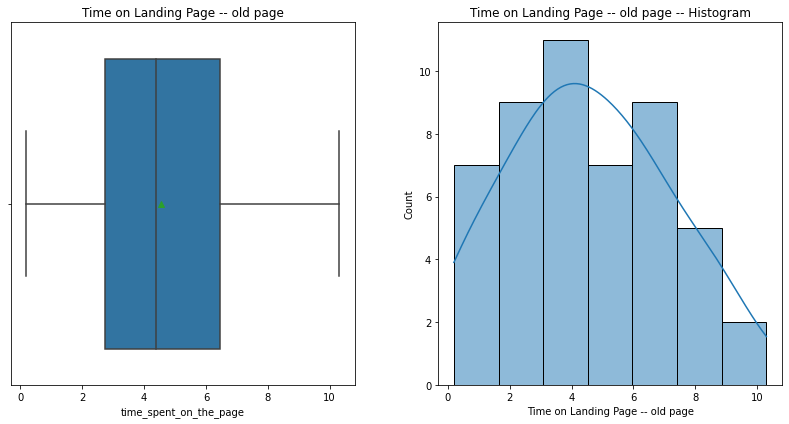

In [18]:
olddf = df[df['landing_page'] == 'old']
plt.figure(figsize=(17, 6))

plt.subplot(131)
plt.title('Time on Landing Page -- old page')
plt.xlabel('Time on Landing Page -- old page')  
sns.boxplot(data=olddf, x='time_spent_on_the_page', showmeans=True);

plt.subplot(132)
plt.title('Time on Landing Page -- old page -- Histogram')
plt.xlabel('Time on Landing Page -- old page')
sns.histplot(data=olddf, x='time_spent_on_the_page', kde = True);

plt.tight_layout(w_pad=5)
del olddf    # free the memory 

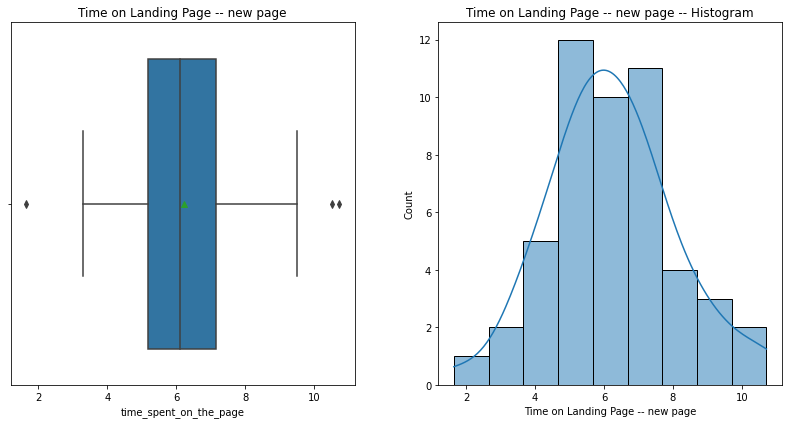

In [19]:
newdf = df[df['landing_page'] == 'new']
plt.figure(figsize=(17, 6))

plt.subplot(131)
plt.title('Time on Landing Page -- new page')
plt.xlabel('Time on Landing Page -- new page')  
sns.boxplot(data=newdf, x='time_spent_on_the_page', showmeans=True);

plt.subplot(132)
plt.title('Time on Landing Page -- new page -- Histogram')
plt.xlabel('Time on Landing Page -- new page')
sns.histplot(data=newdf, x='time_spent_on_the_page', kde = True);

plt.tight_layout(w_pad=5)
del newdf    # free the memory 

Users are spending more time on the new page and if they convert, spend roughly double the amount of time on the new page.  This shows the popularity of the new page, but this test is to determine if there is an increase in conversion rates.  Time spent on the new landing page is just "icing on the cake". 

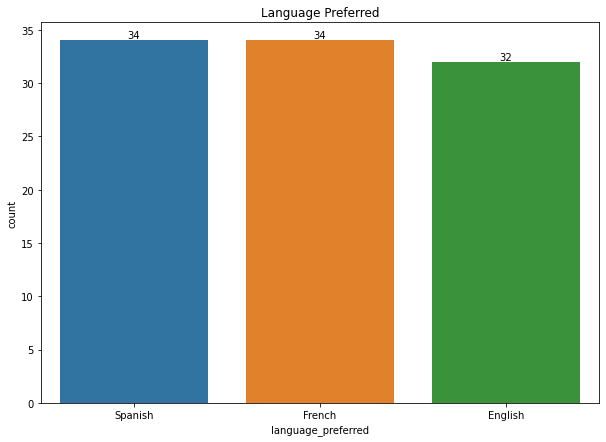

In [36]:
plt.figure(figsize=(10,7))
plt.title('Language Preferred')
plt.xlabel('language_preferred')
ax = sns.countplot(data=df,x='language_preferred',  order = df['language_preferred'].value_counts().index)
ax.bar_label(ax.containers[0]);

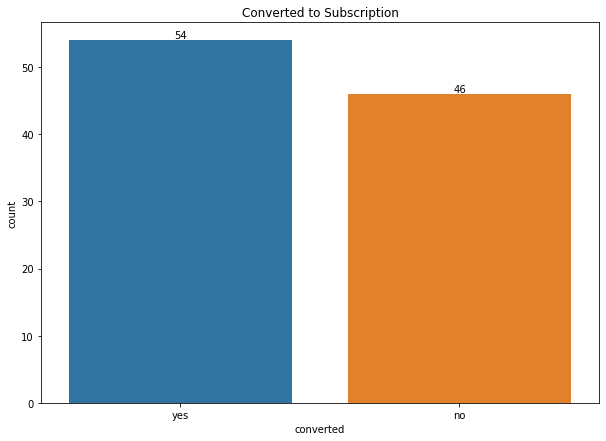

In [37]:
plt.figure(figsize=(10,7))
plt.title('Converted to Subscription')
plt.xlabel('converted')
ax = sns.countplot(data=df,x='converted',  order = df['converted'].value_counts().index) 
ax.bar_label(ax.containers[0]); 

In [18]:
olddf = df[df['landing_page'] == 'old']
newdf = df[df['landing_page'] == 'new']
print('Of the 50 users with the old landing page, the following number of users converted to subscriptions:')
print(olddf['converted'].value_counts())
print('\nThis is the percentage of users with the old landing page that converted to subscriptions:')
print(olddf['converted'].value_counts(normalize=True))
print('\n')
print('Of the 50 users with the new landing page, the following number of users converted to subscriptions:')
print(olddf['converted'].value_counts())
print('\nThis is the percentage of users with the new landing page that converted to subscriptions:')
print(olddf['converted'].value_counts(normalize=True))

del olddf     #free memory and deleting so it does not interfear with another use of olddf later 
del newdf     #free memory and deleting so it does not interfear with another use of newdf later

Of the 50 users with the old landing page, the following number of users converted to subscriptions:
no     29
yes    21
Name: converted, dtype: int64

This is the percentage of users with the old landing page that converted to subscriptions:
no     0.58
yes    0.42
Name: converted, dtype: float64


Of the 50 users with the new landing page, the following number of users converted to subscriptions:
no     29
yes    21
Name: converted, dtype: int64

This is the percentage of users with the new landing page that converted to subscriptions:
no     0.58
yes    0.42
Name: converted, dtype: float64


More people converted than not, but the statistical test needs to be performed to determine its relavancy. 
<br>
The overall conversion rate for both the old and new landing page is 42% which is higher than the national average. 
<br> 
From running the last set of numbers on the conversion rate between the old and new landing pages, it appears quiet likely that there will not be a statistical difference between the conversion rate for the old and new landing page. 

### Bivariate Analysis

The first set of tests is for time on landing page in general and then by language perferrence. The analysis for time on the landing page for the old and new pages was completed in the last section. 

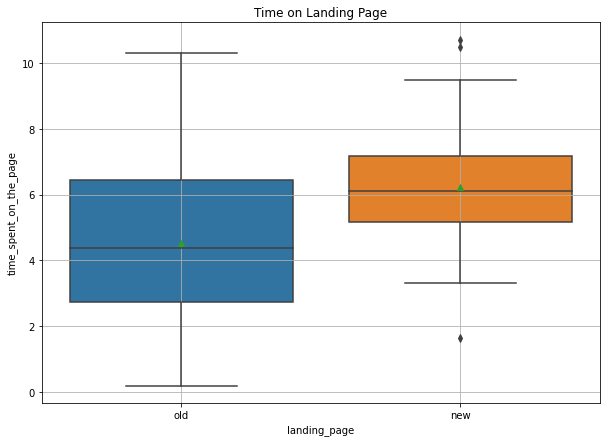

In [22]:
plt.figure(figsize=(10,7))
plt.title('Time on Landing Page')
plt.xlabel('Old and New Landing Page')
plt.ylabel('Time on Landing Page')
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page', 
            order=['old','new'], showmeans=True)
plt.grid()
plt.show();


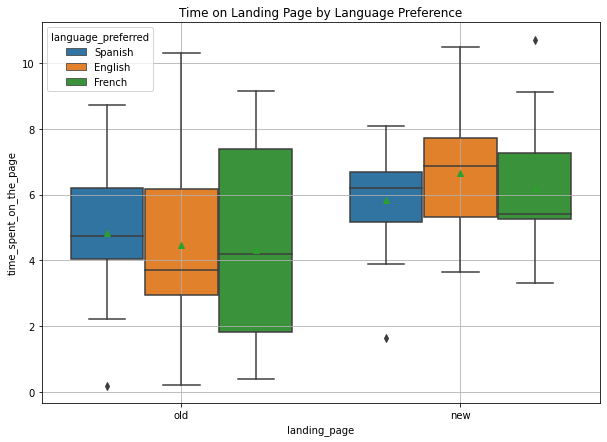

In [21]:
plt.figure(figsize=(10,7))
plt.title('Time on Landing Page by Language Preference')
plt.xlabel('Old and New Landing Page')
plt.ylabel('Time on Landing Page')
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page', hue='language_preferred', 
            order=['old','new'], showmeans=True)
plt.grid()
plt.show();

More time is being spent on the new page and it appears to be indepent of the language preferrence. 

This analysis will look at the conversion rate for the old and new landing pages by langauge preferrence. 

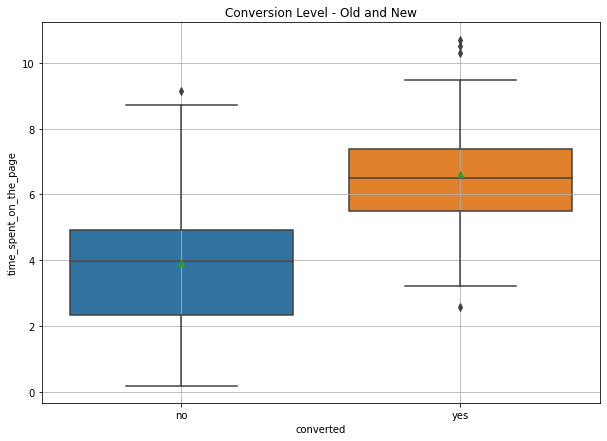

In [24]:
plt.figure(figsize=(10,7))
plt.title('Conversion Level - Old and New')
plt.xlabel('Conversion')
plt.ylabel('Time on Landing Page')
sns.boxplot(data=df, x='converted', y='time_spent_on_the_page', 
            order=['no','yes'], showmeans=True)
plt.grid()
plt.show();

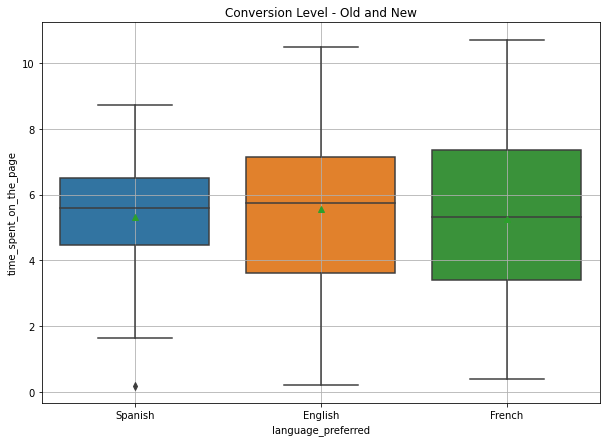

In [23]:
plt.figure(figsize=(10,7))
plt.title('Conversion Level - Old and New')
plt.xlabel('Preferred Language')
plt.ylabel('Time on Landing Page')
sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page', showmeans=True)
plt.grid()
plt.show();

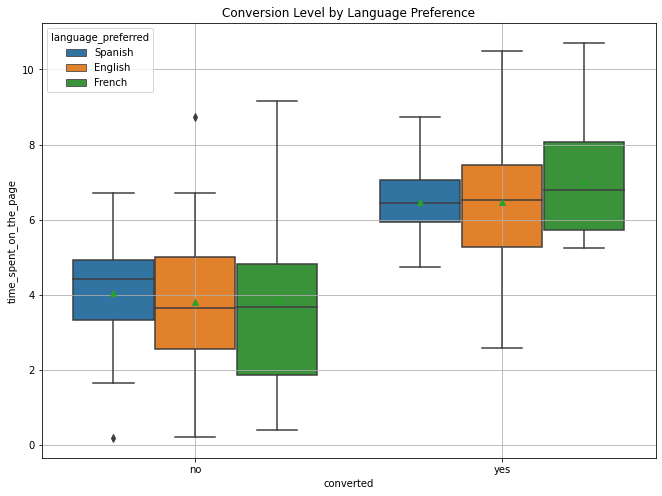

In [25]:
plt.figure(figsize=(11,8))
plt.title('Conversion Level by Language Preference')
plt.xlabel('Conversion')
plt.ylabel('Time on Landing Page')
sns.boxplot(data=df, x='converted', y='time_spent_on_the_page', order=['no','yes'], 
            hue='language_preferred', showmeans=True)
plt.grid()
plt.show();

Conversion levels for the page are higher than the old page, but it appears the conversion rates are indenpent of the language selection.  

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

In [7]:
print('Total time spent on new and old landing page for all users -- sum of all time')
print(df.groupby(['landing_page'])['time_spent_on_the_page'].sum())
print('\n Mean time spent on new and old landing page for all users')
print(df.groupby(['landing_page'])['time_spent_on_the_page'].mean()) 
print('\n Standard deviation for time spent on new and old landing page for all users')
std_new, std_old = df.groupby(['landing_page'])['time_spent_on_the_page'].std()
print('new page:', std_new)
print('old page:', std_old)
print('\n Minimum time spent on new and old landing page for all users')
print(df.groupby(['landing_page'])['time_spent_on_the_page'].min())
print('\n Maxium time spent on new and old landing page for all users')
print(df.groupby(['landing_page'])['time_spent_on_the_page'].max()) 
print('\n')

Total time spent on new and old landing page for all users -- sum of all time
landing_page
new    311.16
old    226.62
Name: time_spent_on_the_page, dtype: float64

 Mean time spent on new and old landing page for all users
landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

 Standard deviation for time spent on new and old landing page for all users
new page: 1.8170310387878268
old page: 2.581974849306046

 Minimum time spent on new and old landing page for all users
landing_page
new    1.65
old    0.19
Name: time_spent_on_the_page, dtype: float64

 Maxium time spent on new and old landing page for all users
landing_page
new    10.71
old    10.30
Name: time_spent_on_the_page, dtype: float64




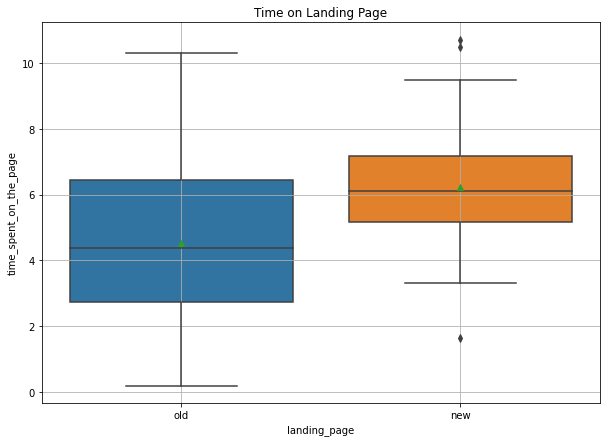

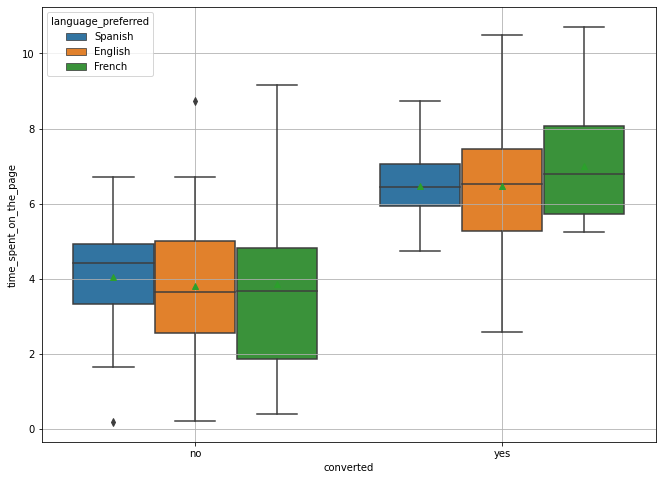

In [33]:
plt.figure(figsize=(10,7))
plt.title('Time on Landing Page')
plt.xlabel('Old and New Landing Page')
plt.ylabel('Time on Landing Page')
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page', order=['old','new'], showmeans=True)
plt.grid()
plt.show()
print('\n')
plt.figure(figsize=(11,8))
sns.boxplot(data=df, x='converted', y='time_spent_on_the_page', order=['no','yes'], 
            hue='language_preferred', showmeans=True)
plt.grid()
plt.show();

### Step 1: Define the null and alternate hypotheses

𝐻0:𝜇1=𝜇2

𝐻𝑎:𝜇1<𝜇2

𝜇1 or mu1 is mean of old landing page 
<br>
𝜇2 or mu2 is mean of new landing page 

### Step 2: Select Appropriate test

This is a comparison of the sample means from 2 independent populations when the standard deviations are unknown.

2-sample independent t-test

From the Week 3 notebook: 
<br>
_Let's test whether the T-test assumptions are satisfied or not_

    Continuous data - Yes, the SAT score is measured on a continuous scale.
    Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
    Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
    Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
    Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

_Voila! We can use two sample T-test for this problem._


### Step 3: Decide the significance level

As mentioned in the "Objective" section, the significance level is 5% or 𝛼=0.05

### Step 4: Collect and prepare data

In [8]:
# rounding the new and old standard deviations to 2 decimal places 
std_new = round(std_new,2)
std_old = round(std_old,2)
print('Rounded to 2 decimal places, the new page standard deviation is:', std_new, 
      'and the old page standard deviation is:', std_old)

newdf = df[df['landing_page'] == 'new']
olddf = df[df['landing_page'] == 'old']

Rounded to 2 decimal places, the new page standard deviation is: 1.82 and the old page standard deviation is: 2.58


### Step 5: Calculate the p-value

In [39]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(newdf['time_spent_on_the_page'], olddf['time_spent_on_the_page'].dropna(), 
                               equal_var = False, alternative = 'greater')
print('t-stat is:', test_stat, '\np-value is: ', p_value)

t-stat is: 3.7867702694199856 
p-value is:  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [19]:
# print the conclusion based on p-value
if p_value < 0.05:
    print('As the p-value',p_value, 'is less than the level of significance, we reject the null hypothesis.')
else:
    print('As the p-value', p_value, 'is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


The p-value is:  0.0001392381225166549 which is much less than the the significance level is 5% or 𝛼=0.05. 

Given this, the null hypothesis has to be rejected.  The users are spending more time on the new landing page than the old landing page.  

### Step 7:  Draw inference

The p-value is much lower than the sigificance level or alpha so the null hypothesis must be rejected.  Therefore, the users are spending more time on the new landing page than the old landing page.  This hypothesis is futher reinforced by looking at the total time users are spending on each landing pahe whihch is: 
* new page:    311.16
* old page:    226.62

There is a sizable difference (84.54 minutes) between how much time users are spending on each landing page.  Just from these numbers, it is obvious that users like the new landing page better.  With this test, there is now the statistical proof.  

This was also seen in the test that were run in the univariate and bivariate analysis sections. 

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

In [9]:
old_converted = olddf['converted'].value_counts()
print('For old landing page, number converted:', old_converted[0], 'number not converted:', old_converted[1])
new_converted = newdf['converted'].value_counts()
print('For new landing page, number converted:', new_converted[0], 'number not converted:', new_converted[1])
print('\n')

For old landing page, number converted: 29 number not converted: 21
For new landing page, number converted: 33 number not converted: 17




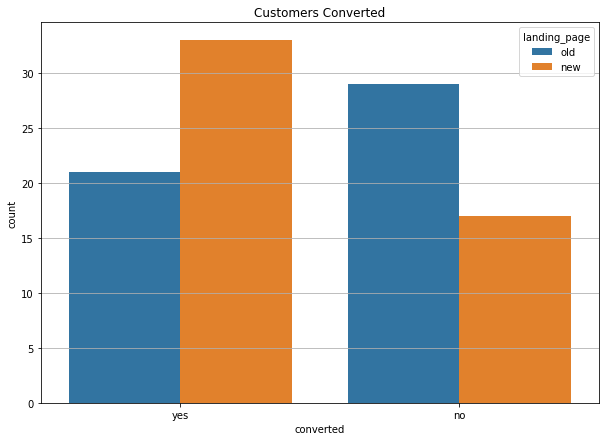

In [10]:
plt.figure(figsize=(10,7))
plt.title('Customers Converted')
plt.xlabel('Customers Converted')
plt.grid()
sns.countplot(data=df,x='converted',  hue='landing_page', order = df['converted'].value_counts().index);

### Step 1: Define the null and alternate hypotheses

Let 𝑝1,𝑝2

be the proportions of conversions for old and new landing page respectively.

This will test the null hypothesis

    𝐻0:𝑝1 = 𝑝2

against the alternate hypothesis

    𝐻𝑎:𝑝2 > 𝑝1


### Step 2: Select Appropriate test

Two Proportion Z-test

* Binomally distributed population - Yes, a product is either defective or non-defective.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.

p1 = (33/50) * 50 = 33 which is greater than 10 
<br>
1-p1 = ((50-33)/50) * 50 = 17 which is greater than 10 

p2 = (29/50) * 50 = 29 which is greater than 10  
1-p2 = ((50-29)/50) * 50 == 21 which is greater than 10  

### Step 3: Decide the significance level

As mentioned in the "Objective" section, the significance level is 5% or 𝛼=0.05

### Step 4: Collect and prepare data

In [11]:
olddf = df[df['landing_page'] == 'old']
olddf = olddf.loc[: , [False, False, True, False, True, False]]
print('The shape of olddf is: ')
print("olddf has", olddf.shape[0], 'rows and', olddf.shape[1], "columns.")
newdf = df[df['landing_page'] == 'new']
newdf = newdf.loc[: , [False, False, True, False, True, False]]
print("newdf has", newdf.shape[0], 'rows and', newdf.shape[1], "columns.")

The shape of olddf is: 
olddf has 50 rows and 2 columns.
newdf has 50 rows and 2 columns.


In [12]:
old_converted = olddf.value_counts()
print('For old landing page, number converted:', old_converted[0], 'number not converted:', old_converted[1])
new_converted = newdf.value_counts()
print('For new landing page, number converted:', new_converted[0], 'number not converted:', new_converted[1])

For old landing page, number converted: 29 number not converted: 21
For new landing page, number converted: 33 number not converted: 17


The data points are: 
* Control numbers: 
    * old number of uses: 50 
    * new number of users: 50 
* Sample size: 
    * old number converted: 29 
    * new number converted: 33
    
Pass [33,29] and [50,50] to the function to get the p-value

### Step 5: Calculate the p-value

In [13]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# find the p-value
test_stat, p_value = proportions_ztest([33,29], [50,50], alternative = 'larger')    
print('z-stat is:', test_stat, '\np-value is:', p_value)

z-stat is: 0.82408564343033 
p-value is: 0.2049454484808052


### Step 6: Compare the p-value with 𝛼

In [21]:
# print the conclusion based on p-value
if p_value < 0.05:
    print('As the p-value',p_value, 'is less than the level of significance, we reject the null hypothesis.')
else:
    print('As the p-value', p_value, 'is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2049454484808052 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw inference

This is interesting.  All the raw numbers and the graphs would lead to the conclusion that there is a higher conversion rate for the new page.  This is seen in the raw numbers: 

* For old landing page, number converted: 29 number not converted: 21
* For new landing page, number converted: 33 number not converted: 17

However, the p-value is way higher than the confidence level so the null hypothesis cannot be rejected.  The conversion rate are the same for the old page and the new page.  

While users are spending more time on the new landing page, the new page is not generating a higher conversion rate.  A higher conversion rate is the goal of the project to create a new landing page.  

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

In [50]:
tabledf = pd.crosstab(df['converted'],df['language_preferred'])
tabledf

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [51]:
indexdf = pd.crosstab(df['converted'],df['language_preferred'],normalize='index')
indexdf

language_preferred,English,French,Spanish
converted,,,
no,0.239130,0.413043,0.347826
yes,0.388889,0.277778,0.333333


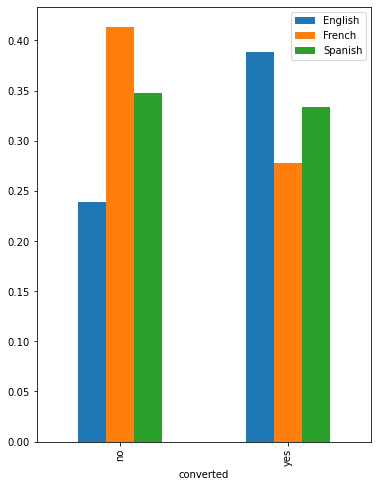

In [52]:
indexdf.plot(kind="bar", figsize=(6,8))
plt.legend()
plt.show()

More users with an English langauge preferrence are converting to be subscribers.  That is not the case with French or Spanish.  In fact for French, just the opposite is true as most Frech users are choosing to stay with the old landing page. 

### Step 1: Define the null and alternate hypotheses

𝐻0: Conversion is independent of language preference

   against the alternate hypothesis

𝐻𝑎: Conversion depends on language preference 


### Step 2: Select Appropriate test

Chi-Square Test for Independence

From the week 3 notebook: 
<br>
Let's test whether the assumptions are satisfied or not

    Categorical variables - Yes
    Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
    Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


### Step 3: Decide the significance level

As mentioned in the "Objective" section, the significance level is 5% or 𝛼=0.05

### Step 4: Collect and prepare data

In [53]:
noEng = tabledf.iloc[0,0]
noFre = tabledf.iloc[0,1]
noSpa = tabledf.iloc[0,2]
yesEng = tabledf.iloc[1,0]
yesFre = tabledf.iloc[1,1]
yesSpa = tabledf.iloc[1,2]
tempdf = pd.DataFrame([[noEng, noFre, noSpa], [yesEng, yesFre, yesSpa]])

# The code is not pretty, but it works.  I could not figure out how to strip the header and index from 
# tabledf so I picked the individual values and created a DataFrame 

### Step 5: Calculate the p-value

In [95]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value  
chi, p_value, dof, expected = chi2_contingency(tempdf)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with 𝛼

In [31]:
# print the conclusion based on p-value
if p_value < 0.05:
    print('As the p-value',p_value, 'is less than the level of significance, we reject the null hypothesis.')
else:
    print('As the p-value', p_value, 'is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw inference

The null hypothesis is the conversion rate is independent of language preference.  This statistical test has failed to reject the null hypothesis which means the conversion rate is indepentent of the langaguge preference.  This does make logical sense.  

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [54]:
newdf = df[df['landing_page'] == 'new']
print('there are',newdf.shape[0], 'rows and', newdf.shape[1], 'columns')

there are 50 rows and 6 columns


In [55]:
newdf['language_preferred'].value_counts()

French     17
Spanish    17
English    16
Name: language_preferred, dtype: int64

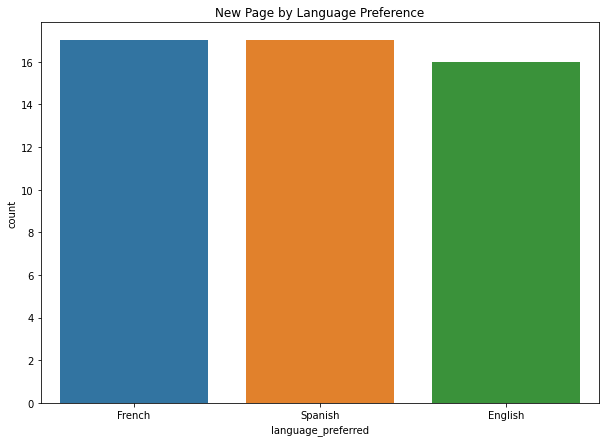

In [56]:
plt.figure(figsize=(10,7))
plt.title('New Page by Language Preference')
plt.xlabel('Language')
sns.countplot(data=newdf,x='language_preferred',  order = df['language_preferred'].value_counts().index);

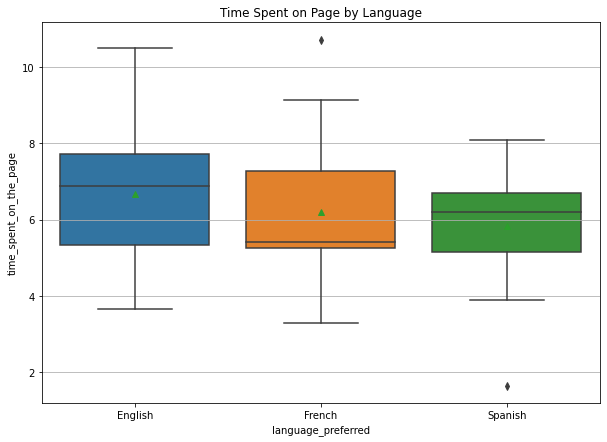

In [22]:
plt.figure(figsize=(10,7))
plt.grid()
plt.title('Time Spent on Page by Language')
plt.xlabel('Language')
sns.boxplot(data=newdf, x='language_preferred', y='time_spent_on_the_page', showmeans=True)
plt.show()


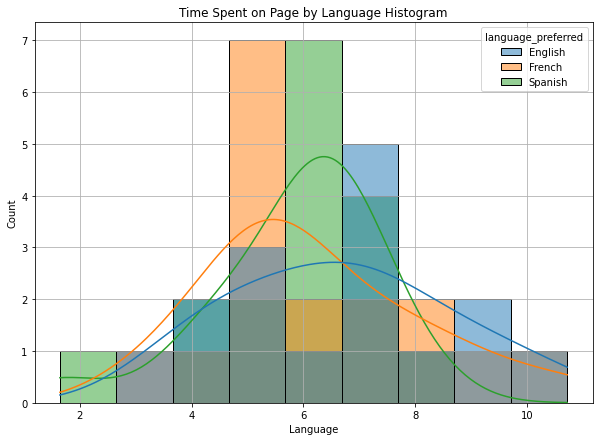

In [28]:
plt.figure(figsize=(10,7))
plt.grid()
plt.title('Time Spent on Page by Language Histogram')
plt.xlabel('Language')
sns.histplot(data=newdf, x='time_spent_on_the_page', hue='language_preferred', kde = True);
plt.show()

In [57]:
langmeans = newdf.groupby(['language_preferred'])['time_spent_on_the_page'].mean()
print('The mean time on the new page for English is', round(langmeans[0],2)) 
print('The mean time on the new page for French is', round(langmeans[1],2))
print('The mean time on the new page for Spanish is', round(langmeans[2],2))

The mean time on the new page for English is 6.66
The mean time on the new page for French is 6.2
The mean time on the new page for Spanish is 5.84


### Step 1: Define the null and alternate hypotheses

Let 𝜇1,𝜇2,𝜇3

be the means of the time spent on the page for English, French, and Spanish respectively.

We will test the null hypothesis

    𝐻0:𝜇1=𝜇2=𝜇3

against the alternative hypothesis

    𝐻𝑎: At least one one mean viewing time for one language is different from the rest.

### Step 2: Select Appropriate test

One-way ANOVA Test

The test is to determine whether the means of more than two, in this case three, independent populations are signiticantly different. 

### Step 3: Decide the significance level

As mentioned in the "Objective" section, the significance level is 5% or 𝛼=0.05

### Step 4: Collect and prepare data

In [58]:
eng_time = newdf[newdf['language_preferred'] == 'English']['time_spent_on_the_page'].sum()
fre_time = newdf[newdf['language_preferred'] == 'French']['time_spent_on_the_page'].sum()
spa_time = newdf[newdf['language_preferred'] == 'Spanish']['time_spent_on_the_page'].sum()
print('Total time spent on page for English is:', eng_time)
print('Total time spent on page for French is:', fre_time)
print('Total time spent on page for Spanish is:', spa_time)

Total time spent on page for English is: 106.62
Total time spent on page for French is: 105.34
Total time spent on page for Spanish is: 99.2


In [59]:
langmeans = newdf.groupby(['language_preferred'])['time_spent_on_the_page'].mean()
print('The mean time on the new page for English is', round(langmeans[0],2)) 
print('The mean time on the new page for French is', round(langmeans[1],2))
print('The mean time on the new page for Spanish is', round(langmeans[2],2))

The mean time on the new page for English is 6.66
The mean time on the new page for French is 6.2
The mean time on the new page for Spanish is 5.84


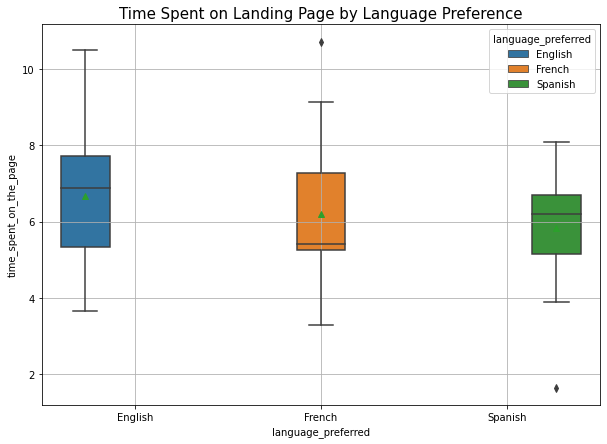

In [60]:
fig, ax = plt.subplots(figsize = (10,7))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = newdf, 
                hue = 'language_preferred', showmeans=True)
a.set_title("Time Spent on Landing Page by Language Preference", fontsize=15)
plt.grid()
plt.show()

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the landing page follows a normal distribution against

against the alternative hypothesis

>$H_a:$ Time spent on the landing page does not follow a normal distribution

In [61]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(newdf['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


In [62]:
# print the conclusion based on p-value
if p_value < 0.05:
    print('As the p-value',p_value, 'is less than the level of significance, we reject the null hypothesis.')
else:
    print('As the p-value', p_value, 'is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.8040016293525696 is greater than the level of significance, we fail to reject the null hypothesis.


### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [63]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( newdf['time_spent_on_the_page'][newdf['language_preferred']=="English"], 
                                   newdf['time_spent_on_the_page'][newdf['language_preferred']=="French"], 
                                   newdf['time_spent_on_the_page'][newdf['language_preferred']=="Spanish"]  )
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


In [64]:
# print the conclusion based on p-value
if p_value < 0.05:
    print('As the p-value',p_value, 'is less than the level of significance, we reject the null hypothesis.')
else:
    print('As the p-value', p_value, 'is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.46711357711340173 is greater than the level of significance, we fail to reject the null hypothesis.


From the week 3 notebook: 
<br>
Test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test

### Step 5: Calculate the p-value

In [21]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(newdf.loc[newdf['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              newdf.loc[newdf['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              newdf.loc[newdf['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('z-stat is:', test_stat, '\np-value is:', p_value)

z-stat is: 0.8543992770006822 
p-value is: 0.43204138694325955


### Step 6: Compare the p-value with 𝛼

In [22]:
# print the conclusion based on p-value
if p_value < 0.05:
    print('As the p-value',p_value, 'is less than the level of significance, we reject the null hypothesis.')
else:
    print('As the p-value', p_value, 'is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw inference

Given this test, we fail to reject the null hypothesis that the mean times for viewing the new landing page are the same for each language.  Statistically speaking, they are the same. Language perference is not a market differentiator. 

## Conclusion 

### Objectives for the test
1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?   
4. Is the time spent on the new page the same for the different language users?

### Test Results
1. Users spend more time on the new landing page.  It is a success. 
2. The conversion rate for the new landing page is not statistically different from the old page. 
3. Langauge preference does not have any statistically bearing on the conversion rate. 
4. The time spent on the new landing page is the same for the different language users. 
5. The conversion rate is 42% for both the old and new landing page which is higher than the national average

### Conclusion 
1. New landing page is popular with the users
2. New landing page does not lead to a higher conversion rate 
3. Main goal for creating the new landing page has not been met  
4. Develop another stategy for increasing conversion rate 

## Business Recommendations

1. Keep the new landing page as it is popular with the users 
2. Determine why the French language user are unhappy with the new landing page 
    1. French has the lowest amount of users accessing the new landing page 
3. Conduct another study to determine a better strategy to increase the conversion rate following these seven guidelines: 
    1. Create Quality Content to Match Search Intent
    2. Use the Right Call To Action 
    3. Focus on Design for Subscriptions
    4. Use Different Types of Content
    5. Use Lightboxes 
    6. Advertise Your Subscription: Solve Problems
    7. Analyze Your Content
4. Track the user journey through the web site to determine the most popular content 
5. Mobile enable the content if not already done so 
6. Develop and implement a better or new advertising/marketing campaign for the subscription service 
7. Clearly show the benefits of subscribing to the web site 

## Future Recommendations:
* Add device type (Computer, iOS, Andriod) to determine the device being used
    * May need to tune content and/or performance for most popular devices 
* Add day and time of day to determine the most popular days and times 
* Add geographic data to determine the most popular areas 
    * Can customize news for local areas
    * Local news sells 
* Analyze user usage and reading habits to determine most popular content
    * Can futher refine using device type 
    * Can further refine using geographic location 
* Ask for feedback and rating on new landing page from customers 
* Add the ability for user to get alerts of breaking news or news relevant to them provided they are a subscribed user
* Add additional commentary and analysis to the content on the site 

___